In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm

# 폰트 경로 확인 및 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 한글 깨짐 방지 - 마이너스 기호 처리
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 서비스 계정 키 경로 설정
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"/home/eunyu/sprintda05-eunyu-a9946f7dea9c.json"

# GCS의 Parquet 파일 경로
gcs_path = 'gs://final_project_enuyu/data/final_project/votes/accounts_userquestionrecord.parquet'

# 데이터 불러오기
userquestionrecord_df = pd.read_parquet(gcs_path, engine='pyarrow')
userquestionrecord_df

,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
0,771777,C,2023-04-28 12:27:49,849469,252,849436,998458,0,N,2023-04-28 12:27:49,0,0
1,771800,C,2023-04-28 12:28:02,849446,244,849436,998459,0,N,2023-04-28 12:28:02,0,0
2,771812,C,2023-04-28 12:28:09,849454,183,849436,998460,1,N,2023-04-28 12:28:09,0,0
3,771828,C,2023-04-28 12:28:16,847375,101,849436,998461,0,N,2023-04-28 12:28:16,0,0
4,771851,C,2023-04-28 12:28:26,849477,209,849436,998462,1,N,2023-04-28 12:28:26,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1217553,161666166,C,2024-05-07 11:29:07,945560,2614,1001607,190864020,1,N,2024-05-07 11:29:07,0,0
1217554,161666461,C,2024-05-08 01:34:56,850774,1679,855525,200139931,0,N,2024-05-08 01:34:56,0,0
1217555,161666462,C,2024-05-08 01:35:02,855509,2605,855525,200139932,0,N,2024-05-08 01:35:02,0,0
1217556,161666463,C,2024-05-08 01:36:00,855526,3801,855525,200139933,0,N,2024-05-08 01:36:00,0,0


In [3]:
userquestionrecord_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217558 entries, 0 to 1217557
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   id                 1217558 non-null  int64         
 1   status             1217558 non-null  object        
 2   created_at         1217558 non-null  datetime64[ns]
 3   chosen_user_id     1217558 non-null  int64         
 4   question_id        1217558 non-null  int64         
 5   user_id            1217558 non-null  int64         
 6   question_piece_id  1217558 non-null  int64         
 7   has_read           1217558 non-null  int64         
 8   answer_status      1217558 non-null  object        
 9   answer_updated_at  1217558 non-null  datetime64[ns]
 10  report_count       1217558 non-null  int64         
 11  opened_times       1217558 non-null  int64         
dtypes: datetime64[ns](2), int64(8), object(2)
memory usage: 111.5+ MB


In [4]:
userquestionrecord_df.columns.tolist()

['id',
 'status',
 'created_at',
 'chosen_user_id',
 'question_id',
 'user_id',
 'question_piece_id',
 'has_read',
 'answer_status',
 'answer_updated_at',
 'report_count',
 'opened_times']

In [5]:
userquestionrecord_df.dtypes

id                            int64
status                       object
created_at           datetime64[ns]
chosen_user_id                int64
question_id                   int64
user_id                       int64
question_piece_id             int64
has_read                      int64
answer_status                object
answer_updated_at    datetime64[ns]
report_count                  int64
opened_times                  int64
dtype: object

In [6]:
userquestionrecord_df.isnull().sum()

id                   0
status               0
created_at           0
chosen_user_id       0
question_id          0
user_id              0
question_piece_id    0
has_read             0
answer_status        0
answer_updated_at    0
report_count         0
opened_times         0
dtype: int64

In [7]:
userquestionrecord_df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,1217558.0,NaN,NaN,NaN,59572979.018822,771777.0,15539652.75,53026805.0,94809596.25,161666464.0,46081927.886242
status,1217558,3,C,1156322,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created_at,1217558,NaN,NaN,NaN,2023-05-17 12:51:25.947102208,2023-04-28 12:27:49,2023-05-10 01:42:11,2023-05-15 15:43:01.500000,2023-05-22 11:01:03.750000128,2024-05-08 01:36:18,NaN
chosen_user_id,1217558.0,NaN,NaN,NaN,1092603.584565,833112.0,883692.0,1091749.0,1235698.0,1579422.0,202758.478202
question_id,1217558.0,NaN,NaN,NaN,684.389544,99.0,275.0,469.0,942.0,5133.0,625.039927
user_id,1217558.0,NaN,NaN,NaN,1105789.856924,838023.0,884619.0,1117537.0,1259186.0,1583358.0,206270.380697
question_piece_id,1217558.0,NaN,NaN,NaN,74132114.86932,998458.0,18541420.5,66168425.5,117673456.75,208351468.0,57572369.476189
has_read,1217558.0,NaN,NaN,NaN,0.555153,0.0,0.0,1.0,1.0,1.0,0.496949
answer_status,1217558,3,N,1097932,NaN,NaN,NaN,NaN,NaN,NaN,NaN
answer_updated_at,1217558,NaN,NaN,NaN,2023-05-17 13:44:38.920359680,2023-04-28 12:27:49,2023-05-10 02:38:44.750000128,2023-05-15 16:29:08.500000,2023-05-22 11:41:54.750000128,2024-05-08 01:36:18,NaN



'status' 고유값 수: 3
status
C    1156322
I      60578
B        658
Name: count, dtype: int64


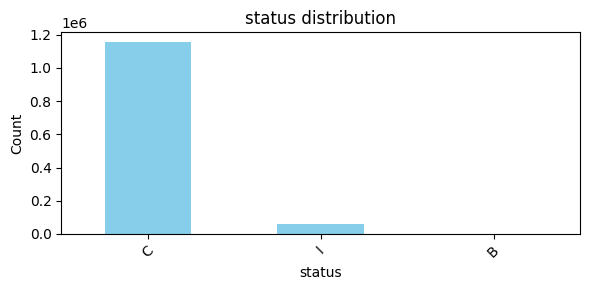


'answer_status' 고유값 수: 3
answer_status
N    1097932
A     111761
P       7865
Name: count, dtype: int64


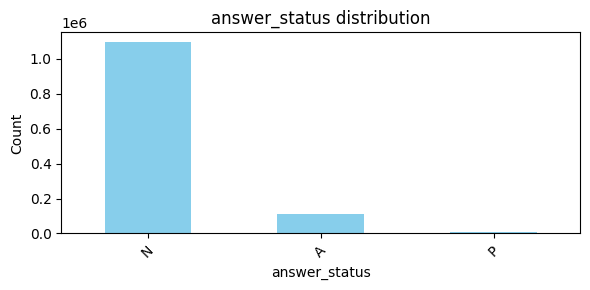

In [11]:
plt.rcParams['font.family'] = 'NanumGothic'


# 한글 폰트 없을 경우 영문 기본 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# object 또는 category 타입 컬럼 추출
categorical_cols = userquestionrecord_df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"\n'{col}' 고유값 수:", userquestionrecord_df[col].nunique())
    print(userquestionrecord_df[col].value_counts(dropna=False).head(5))  # 결측 포함 출력

    # 시각화
    plt.figure(figsize=(6, 3))
    userquestionrecord_df[col].value_counts(dropna=False).head(10).plot(
        kind='bar', color='skyblue'
    )
    plt.title(f"{col} distribution")  
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


C: Closed (닫힘) // I: Initial (초성 열림) // B: Blocked (차단)       
                  
N: Not Answered (미답변) // P: Private (비공개) // A: Available (공개)